In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [30]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | padang
Processing Record 2 of Set 1 | fairbanks
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | xuddur
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | makakilo city
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | tenenkou
Processing Record 23 of Set 1 |

Processing Record 38 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 39 of Set 4 | grand gaube
Processing Record 40 of Set 4 | te anau
Processing Record 41 of Set 4 | panorama
Processing Record 42 of Set 4 | mawlaik
Processing Record 43 of Set 4 | glendive
Processing Record 44 of Set 4 | butaritari
Processing Record 45 of Set 4 | coihaique
Processing Record 46 of Set 4 | arraial do cabo
Processing Record 47 of Set 4 | wenling
Processing Record 48 of Set 4 | kavieng
Processing Record 49 of Set 4 | englehart
Processing Record 50 of Set 4 | kem
Processing Record 1 of Set 5 | longyearbyen
Processing Record 2 of Set 5 | seoul
Processing Record 3 of Set 5 | banda aceh
Processing Record 4 of Set 5 | iraucuba
Processing Record 5 of Set 5 | elizabeth city
Processing Record 6 of Set 5 | college
Processing Record 7 of Set 5 | kushima
Processing Record 8 of Set 5 | korla
Processing Record 9 of Set 5 | buala
Processing Record 10 of Set 5 | xghajra
City not found. Skipping...


Processing Record 24 of Set 8 | hue
Processing Record 25 of Set 8 | vestmannaeyjar
Processing Record 26 of Set 8 | ambon
Processing Record 27 of Set 8 | hamadan
Processing Record 28 of Set 8 | uarini
Processing Record 29 of Set 8 | keti bandar
Processing Record 30 of Set 8 | kargasok
Processing Record 31 of Set 8 | verkhnevilyuysk
Processing Record 32 of Set 8 | usinsk
Processing Record 33 of Set 8 | vostok
Processing Record 34 of Set 8 | whangamata
Processing Record 35 of Set 8 | marabba
Processing Record 36 of Set 8 | kawalu
Processing Record 37 of Set 8 | urumqi
Processing Record 38 of Set 8 | santa cruz
Processing Record 39 of Set 8 | ekhabi
Processing Record 40 of Set 8 | tagbac
Processing Record 41 of Set 8 | abu zabad
Processing Record 42 of Set 8 | saurimo
Processing Record 43 of Set 8 | nola
Processing Record 44 of Set 8 | aquiraz
Processing Record 45 of Set 8 | eskasem
City not found. Skipping...
Processing Record 46 of Set 8 | altamira
Processing Record 47 of Set 8 | pavlovk

Processing Record 16 of Set 12 | opuwo
Processing Record 17 of Set 12 | vysokogornyy
Processing Record 18 of Set 12 | nishihara
Processing Record 19 of Set 12 | pointe-noire
Processing Record 20 of Set 12 | paucartambo
City not found. Skipping...
Processing Record 21 of Set 12 | shar
Processing Record 22 of Set 12 | tongchuan
Processing Record 23 of Set 12 | neiafu
Processing Record 24 of Set 12 | kurchum
Processing Record 25 of Set 12 | kulu
Processing Record 26 of Set 12 | kulykiv
Processing Record 27 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 28 of Set 12 | barbar
City not found. Skipping...
Processing Record 29 of Set 12 | madang
Processing Record 30 of Set 12 | laviana
Processing Record 31 of Set 12 | rochegda
Processing Record 32 of Set 12 | rio gallegos
Processing Record 33 of Set 12 | clyde river
Processing Record 34 of Set 12 | vadakku valliyur
Processing Record 35 of Set 12 | chara
Processing Record 36 of Set 12 | leshukonskoye
Processing Record 37 of

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Padang,-0.9492,100.3543,75.31,64,100,7.20,ID,2022-02-09 21:10:31
1,Fairbanks,64.8378,-147.7164,-5.40,74,100,3.44,US,2022-02-09 21:10:14
2,Dikson,73.5069,80.5464,1.49,95,99,22.26,RU,2022-02-09 21:08:15
3,Pevek,69.7008,170.3133,-32.75,100,100,5.17,RU,2022-02-09 21:10:31
4,Bluff,-46.6000,168.3333,59.81,96,78,5.08,NZ,2022-02-09 21:10:32
5,Nikolskoye,59.7035,30.7861,35.71,89,100,9.46,RU,2022-02-09 21:10:32
6,East London,-33.0153,27.9116,69.89,79,0,6.22,ZA,2022-02-09 21:05:40
7,Cherskiy,68.7500,161.3000,-45.51,100,84,4.09,RU,2022-02-09 21:06:53
8,Rikitea,-23.1203,-134.9692,79.00,68,0,15.26,PF,2022-02-09 21:05:48
9,Port Elizabeth,-33.9180,25.5701,65.68,86,2,7.25,ZA,2022-02-09 21:05:38


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Padang,ID,2022-02-09 21:10:31,-0.9492,100.3543,75.31,64,100,7.20
1,Fairbanks,US,2022-02-09 21:10:14,64.8378,-147.7164,-5.40,74,100,3.44
2,Dikson,RU,2022-02-09 21:08:15,73.5069,80.5464,1.49,95,99,22.26
3,Pevek,RU,2022-02-09 21:10:31,69.7008,170.3133,-32.75,100,100,5.17
4,Bluff,NZ,2022-02-09 21:10:32,-46.6000,168.3333,59.81,96,78,5.08
...,...,...,...,...,...,...,...,...,...
563,Uberaba,BR,2022-02-09 21:25:44,-19.7483,-47.9319,81.18,50,0,11.50
564,Ponferrada,ES,2022-02-09 21:25:44,42.5466,-6.5962,52.07,72,0,4.00
565,Luxor,EG,2022-02-09 21:25:45,25.6989,32.6421,60.85,44,0,4.61
566,Mitu,CO,2022-02-09 21:25:45,1.1983,-70.1733,78.48,75,100,1.63


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644442816.7421987

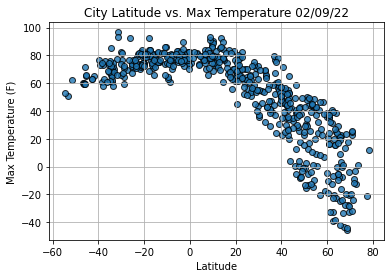

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

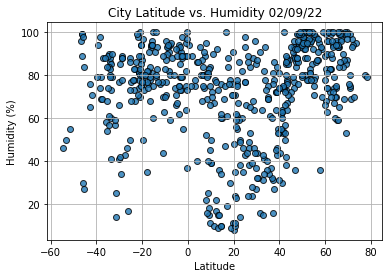

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

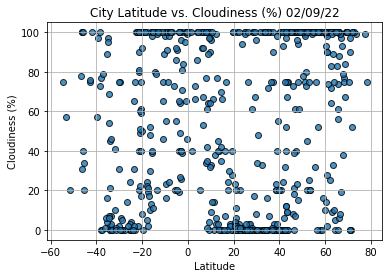

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

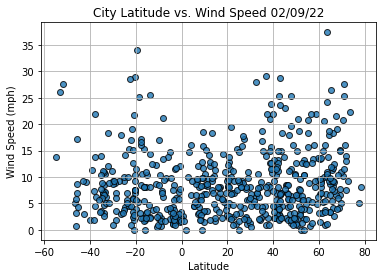

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()